In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Read in the csv file as a dataframe called df

In [3]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\911.csv')

In [4]:
#Check the info() of the df 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
 #Check the info() of the df 

In [7]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
#Check the columns of the df

In [9]:
print(df.columns)

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')


In [10]:
#What are the top 5 zipcodes for 911 calls?

In [11]:
df['zip'].value_counts(dropna = True).iloc[:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [12]:
#What are the top 5 townships (twp) for 911 calls?

In [13]:
df['twp'].value_counts().iloc[:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [14]:
#Take a look at the 'title' column, how many unique title codes are there?

In [15]:
df['title'].nunique()

110

'''
In the titles column there are "Reasons/Departments" specified before the title code. 
These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" 
that contains this string value
'''

In [16]:
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [17]:
#What is the most common Reason for a 911 call based off of this new column? 

In [18]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [19]:
#use seaborn to create a countplot of 911 calls by Reason.

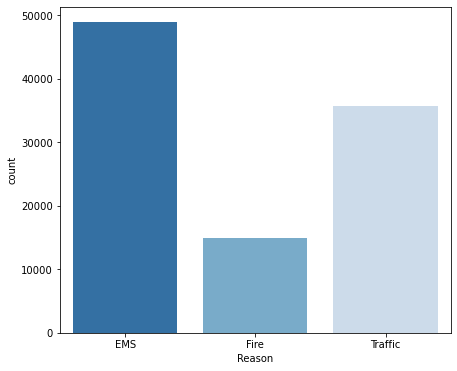

In [20]:
plt.figure(figsize = (7,6))
sns.countplot(x = 'Reason', palette = 'Blues_r',data = df)

In [21]:
#What is the data type of the objects in the timeStamp column?

In [22]:
type(df['timeStamp'].iloc[0])

str

In [23]:
# Use pd.to_datetime to convert the column from strings to DateTime objects. 

In [24]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [25]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
#You can now grab specific attributes from a Datetime object by calling them. For example:

In [27]:
time = df['timeStamp'].iloc[5]
time.hour

17

In [28]:
#use .apply() to create 3 new columns called Hour, Month, and Day of Week. 
#You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.

In [29]:
df["Hour"] = df["timeStamp"].apply(lambda time:time.hour)
df["Month"] = df["timeStamp"].apply(lambda time:time.month)
df["Day of Week"] = df["timeStamp"].apply(lambda time:time.dayofweek)


In [30]:
df.sample()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
22477,40.297681,-75.647944,FARMINGTON AVE & EVANS RD; UPPER POTTSGROVE; 2...,19464.0,Traffic: VEHICLE ACCIDENT -,2016-02-04 04:17:01,UPPER POTTSGROVE,FARMINGTON AVE & EVANS RD,1,Traffic,4,2,3


In [31]:
#Use the .map() with this dictionary to map the actual string names to the day of the week: **

In [32]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [33]:
df['Day of Week'] = df['Day of Week'].apply(lambda int:dmap[int])

In [34]:
#Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

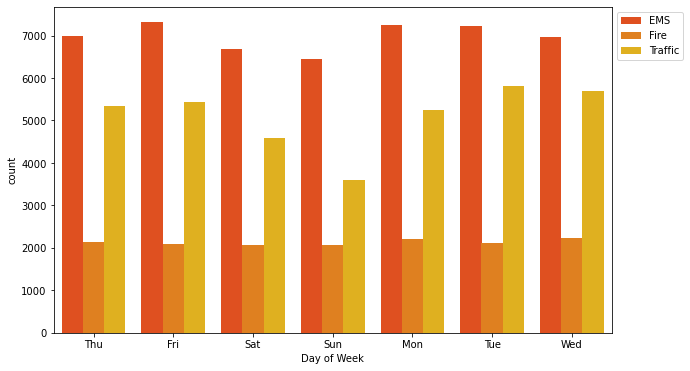

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Day of Week', hue = 'Reason', palette = 'autumn', data = df)
plt.legend(bbox_to_anchor = (1,1))

In [36]:
#Now do the same for Month:

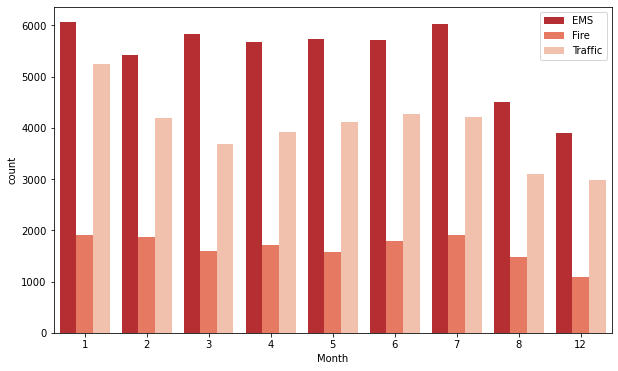

In [37]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Month', hue = 'Reason', palette ='Reds_r', data = df)
plt.legend(bbox_to_anchor = (1,1))

#Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method 
for aggregation.Use the head() method on this returned DataFrame.

In [38]:
byMonth = df.groupby(by= 'Month').count()

In [63]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Month
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,1
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,2
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,3
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,4
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,5


In [40]:
#Now create a simple plot off of the dataframe indicating the count of calls per month.

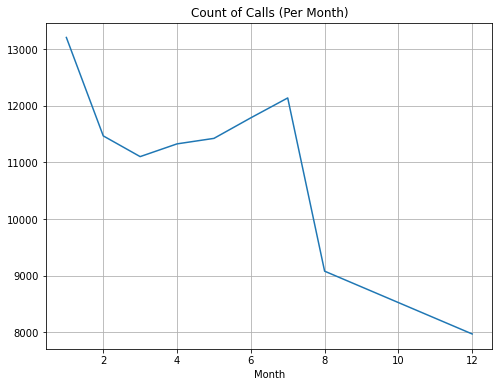

In [41]:
plt.figure(figsize = (8,6))
byMonth['lng'].plot()
plt.grid()
plt.title("Count of Calls (Per Month)")
plt.show()

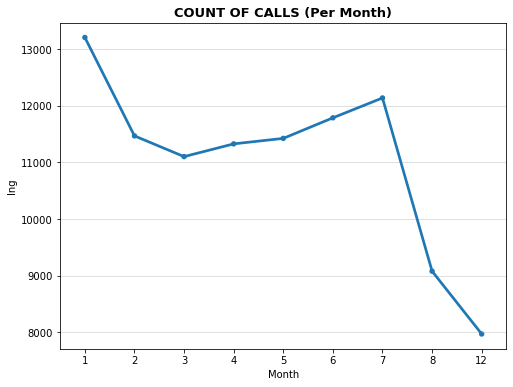

In [42]:
plt.figure(figsize=(8,6))
plt.title("COUNT OF CALLS (Per Month)", fontdict = {'fontweight':'bold', 'fontsize':13})
sns.pointplot(x=byMonth.index, y = 'lng', data = byMonth, markers = ".")
plt.grid(axis = "y", alpha = 0.5)
plt.show()

In [66]:
byMonth['Month'] = byMonth.index
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Month
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,1
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,2
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,3
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,4
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,5
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,6
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,7
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,8
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,12


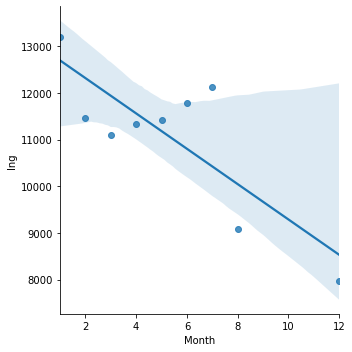

In [44]:
sns.lmplot(x = 'Month', y = 'lng', data = byMonth)

In [45]:
df['Date'] = df['timeStamp'].apply(lambda time:time.date())

In [46]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [47]:
temp = df.groupby(by = 'Date').count()

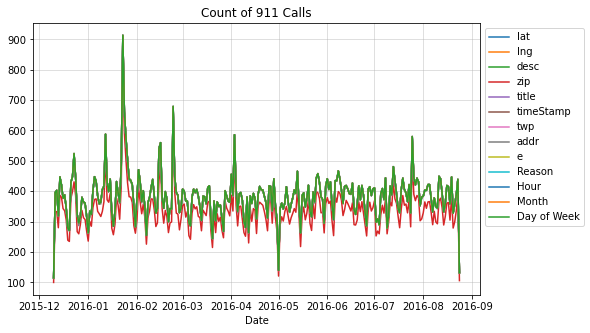

In [51]:

temp.plot(figsize = (8,5), label = "Counts")
plt.legend(bbox_to_anchor = (1,1))
plt.title("Count of 911 Calls")
plt.yticks()
plt.grid(alpha = 0.5)
plt.show()

In [ ]:
traffic = df[df['Reason'] == 'Traffic'].groupby(by = 'Date').count()['lng']
traffic.plot(figsize = (8,5),title = 'Traffic')

In [ ]:
df[df['Reason'] == 'Fire'].groupby(by = 'Date').count()['lng'].plot(figsize = (8,6),title = 'Fire')

In [ ]:
df[df['Reason'] == 'EMS'].groupby(by = 'Date').count()['lng'].plot(figsize = (8,6))
plt.title('EMS')

In [70]:
dfGrid = df.groupby(by = ['Day of Week', 'Hour']).count()['lng'].unstack()
dfGrid = dfGrid.loc[['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']]

In [71]:
dfGrid

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467


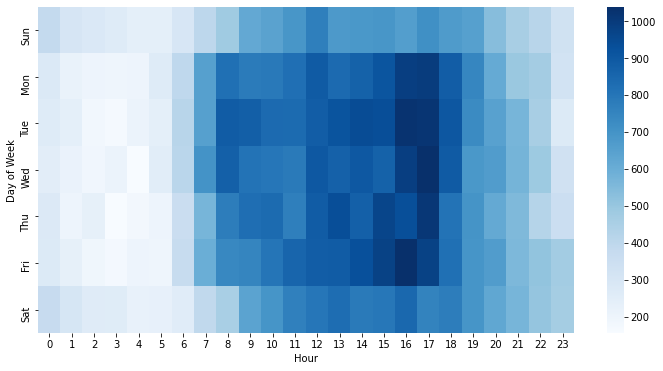

In [55]:
plt.figure(figsize = (12,6))
sns.heatmap(dfGrid, cmap = 'Blues')

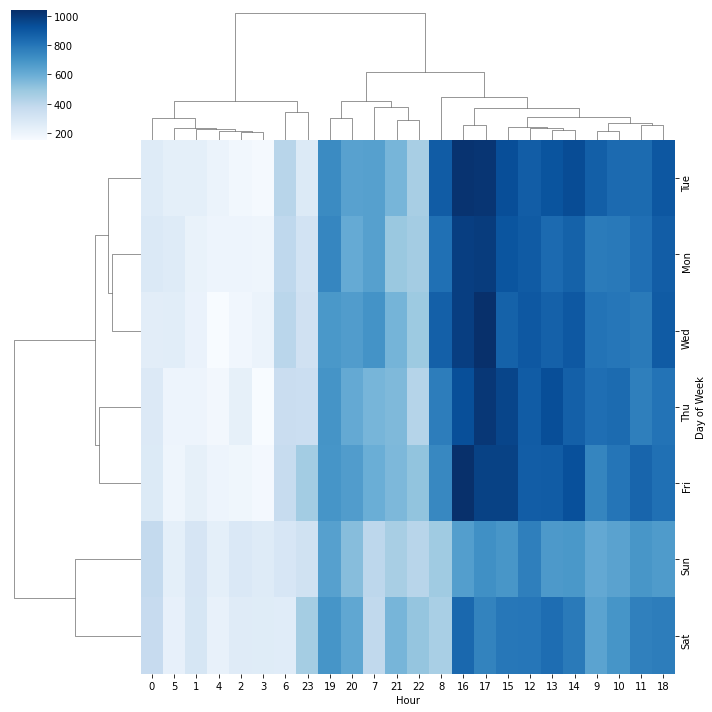

In [74]:
sns.clustermap(dfGrid, cmap = 'Blues')

In [76]:
dfMonth = df.groupby(by = ['Day of Week', 'Month']).count()['lng'].unstack()
dfMonth = dfMonth.loc[['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']]

In [77]:
dfMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978


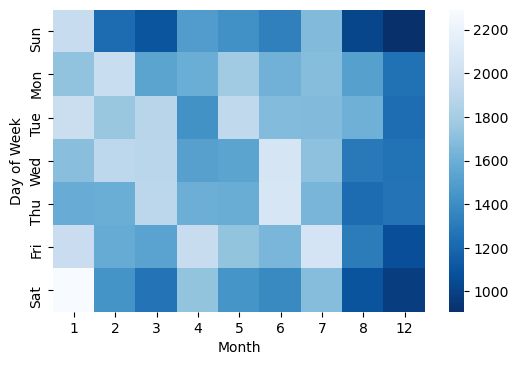

In [80]:
plt.figure(dpi = 100)
sns.heatmap(dfMonth, cmap ='Blues_r')

<Figure size 600x400 with 0 Axes>

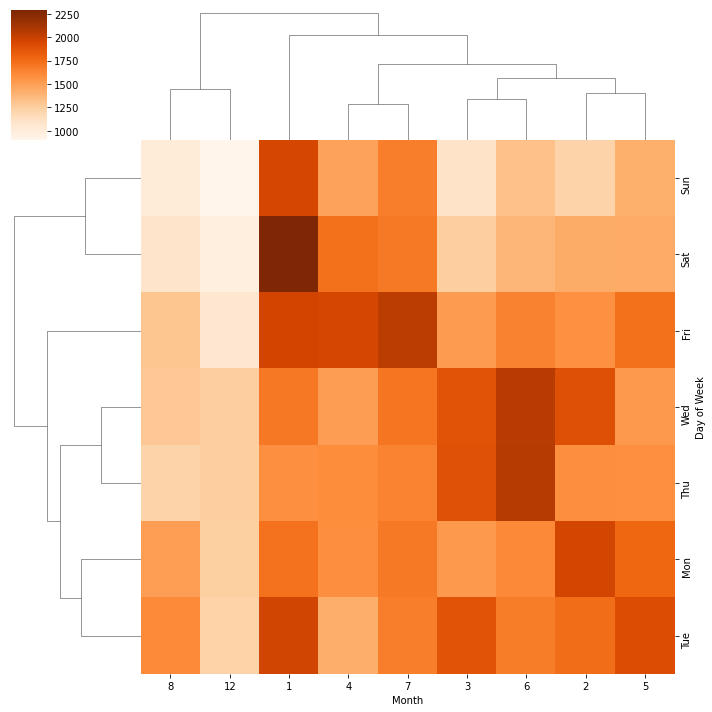

In [79]:
plt.figure(dpi = 100)
sns.clustermap(dfMonth, cmap = 'Oranges')